In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [ ]:
# this is conversion values of new users adding to cart
df = pd.read_csv('for_heatmap.txt')

In [7]:
df.dtypes

month_date         object
deviceCategory     object
addedToCart       float64
m_number            int64
dtype: object

In [8]:
df.head()

,month_date,deviceCategory,addedToCart,m_number
0,2020-08-01,desktop,5.193706,0
1,2020-08-01,mobile,4.828042,0
2,2020-08-01,tablet,4.946996,0
3,2020-09-01,desktop,4.414930,1
4,2020-09-01,mobile,4.344436,1


In [ ]:
# when pivoting i change the structure of df
# columns -- what values will become names of columns
# index -- what will become index
# values -- with what to fill values in new columns 
df_hm = df.pivot(columns='deviceCategory', index='m_number', values='addedToCart')
df_hm

deviceCategory,desktop,mobile,tablet
m_number,,,
0,5.193706,4.828042,4.946996
1,4.414930,4.344436,4.463691
2,2.822051,3.429204,3.022269
3,2.066769,4.061880,3.907023
4,4.828866,3.891366,4.005224
5,4.727956,3.416952,3.027480
6,4.796363,3.576822,2.223371
7,4.501626,3.288093,3.156313
8,5.349756,3.756023,4.720812


In [18]:
df_hm2 = df_hm.copy()
df_hm2

deviceCategory,desktop,mobile,tablet
m_number,,,
0,5.193706,4.828042,4.946996
1,4.414930,4.344436,4.463691
2,2.822051,3.429204,3.022269
3,2.066769,4.061880,3.907023
4,4.828866,3.891366,4.005224
5,4.727956,3.416952,3.027480
6,4.796363,3.576822,2.223371
7,4.501626,3.288093,3.156313
8,5.349756,3.756023,4.720812


In [ ]:
# i tried to normalize values, but it didnt work as i thought it would
df_hm2['desktop'] = 2*(df_hm2['desktop'].values / 10)-1
df_hm2['mobile'] = 2*(df_hm2['mobile'].values / 10)-1
df_hm2['tablet'] = 2*(df_hm2['tablet'].values / 10)-1

In [20]:
df_hm2

deviceCategory,desktop,mobile,tablet
m_number,,,
0,0.038741,-0.034392,-0.010601
1,-0.117014,-0.131113,-0.107262
2,-0.435590,-0.314159,-0.395546
3,-0.586646,-0.187624,-0.218595
4,-0.034227,-0.221727,-0.198955
5,-0.054409,-0.316610,-0.394504
6,-0.040727,-0.284636,-0.555326
7,-0.099675,-0.342381,-0.368737
8,0.069951,-0.248795,-0.055838


<Axes: xlabel='deviceCategory', ylabel='m_number'>

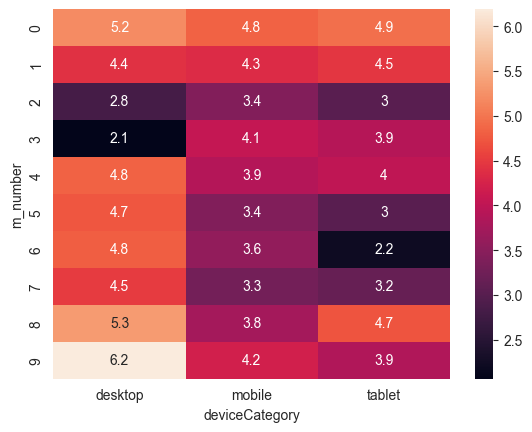

In [21]:
sns.heatmap(df_hm, annot=True)

<Axes: xlabel='deviceCategory', ylabel='m_number'>

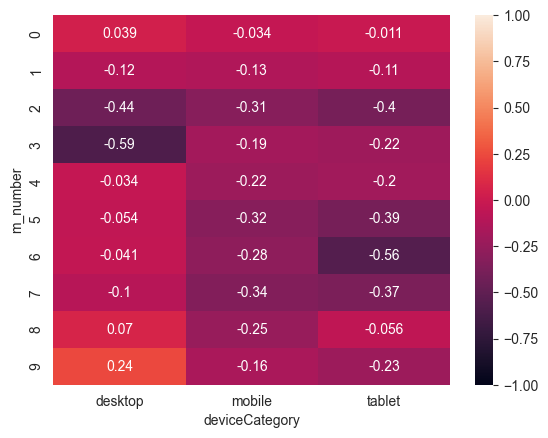

In [27]:
sns.heatmap(df_hm2, annot=True, vmax=1, vmin=-1)

In [28]:
df_hm3 = df_hm.copy()

In [32]:
# here im finding min and max values in df
# two times because first one is for each column and second one is for this array of column values
vmin = df_hm3.min().min()
vmax = df_hm3.max().max()

In [ ]:
# this is correctly normalized df
df_norm = (df_hm3 - vmin)/(vmax - vmin)*2-1
df_norm

deviceCategory,desktop,mobile,tablet
m_number,,,
0,0.516150,0.338851,0.396528
1,0.138547,0.104366,0.162189
2,-0.633788,-0.339400,-0.536709
3,-1.000000,-0.032636,-0.107721
4,0.339251,-0.115312,-0.060106
5,0.290323,-0.345340,-0.534182
6,0.323491,-0.267824,-0.924069
7,0.180583,-0.407820,-0.471716
8,0.591813,-0.180936,0.286859


<Axes: xlabel='deviceCategory', ylabel='m_number'>

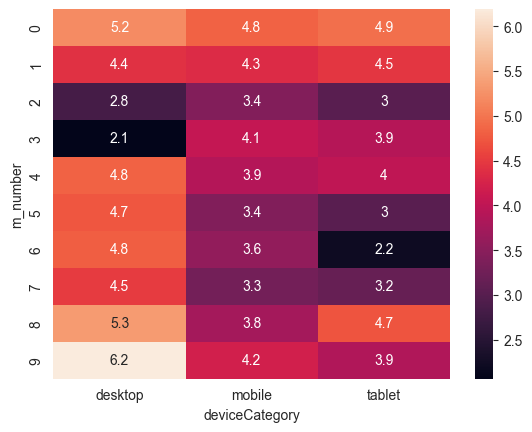

In [35]:
sns.heatmap(df_hm, annot=True)

<Axes: xlabel='deviceCategory', ylabel='m_number'>

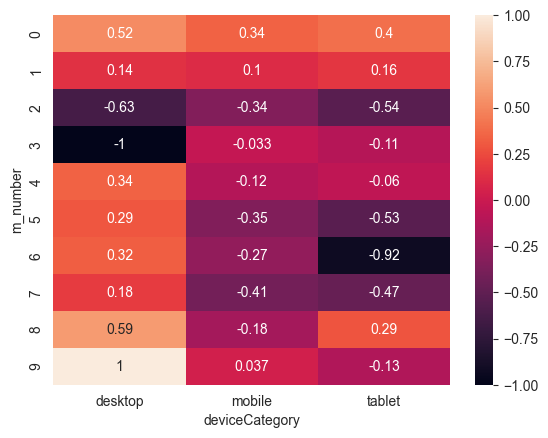

In [36]:
sns.heatmap(df_norm, annot=True)